In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plotting(L,N,Iteration,noisevar,stp_size,theta):
    w = np.zeros((L, 1))  
    wtot = np.zeros((N, Iteration))
    for It in range(0, Iteration): 
        X = np.random.randn(L, N)
        noise = np.random.randn(N, 1) * np.sqrt(noisevar)
        y = np.zeros((N, 1))
        y = np.dot(X.T, theta)
        y = y + noise
        w = np.zeros((L, 1))
        for i in range(0, N):
            mu = 1 / (stp_size*(i+1))  # Step size
            e = y[i] - np.dot(w.T, X[:,i])  # Error computation
            w = w + mu * e * X[:,i]
            wtot[i][It] = w[0][0]
            
    theta1 = theta[0] * np.ones((N, 1))
    plt.plot(theta1, color='red', label = 'actual theta')
    meanw = np.mean(wtot.T, axis=0)
    plt.plot(meanw, color='k', linestyle='solid', label = 'calculated theta' )
    for i in range(0, N):
        if i % 10 == 0 and i >= 30:
            plt.errorbar(i, meanw[i], yerr=np.std(wtot[i, :], axis=0), capsize=3)
    plt.title("1/step size coeff=%f" %stp_size + "\n actual theta=%f" %theta[0] + "\n calculated theta=%f" %meanw[N-1])
    plt.legend(loc = 0)
    plt.show()

# All parts

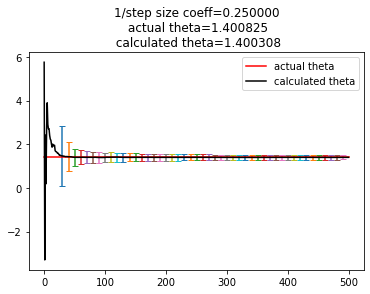

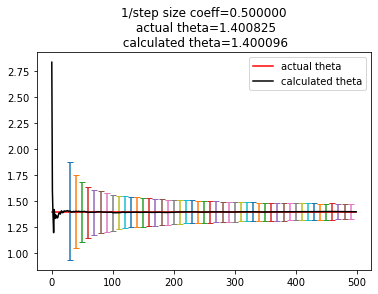

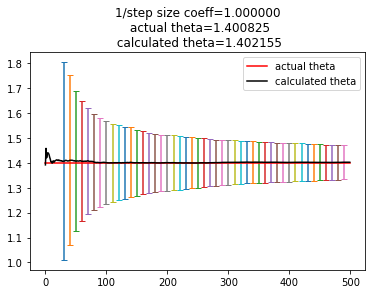

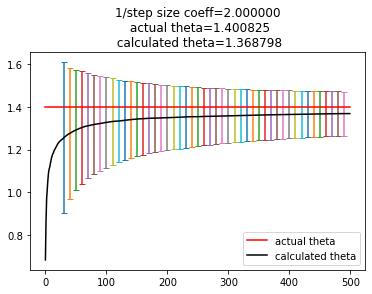

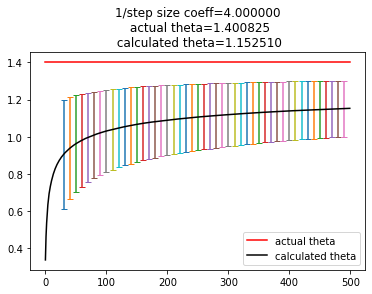

In [5]:
L = 2  # Dimension of the unknown vector
N = 500  # Number of Data
Iteration = 1000
noisevar = 0.1
stp_size = np.array([0.25,0.5,1,2,4])
theta = np.random.randn(L, 1)  # random theta
for j in range(0,len(stp_size)):
    plotting(L,N,Iteration,noisevar,stp_size[j],theta)

# Comments:

***1. Best result with 1/step size coeff around 0.5 but first error is too big, increasing or decreasing step size coeff from this value will result in non-convergent value of calculated theta with respect to actual theta***

***2. This is due to the fact that too big step size will result in skipping the value of optimal theta and too small step size will result in never reaching the actual value of theta.***

***3. 1/step size coeff = 1 is the base case.***